Task 1: 

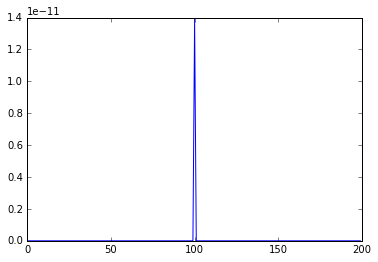

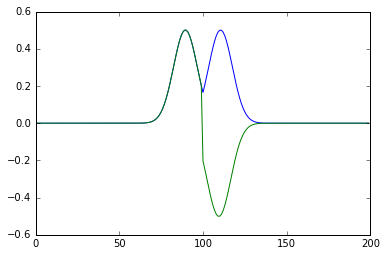

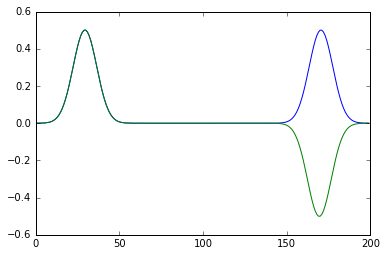

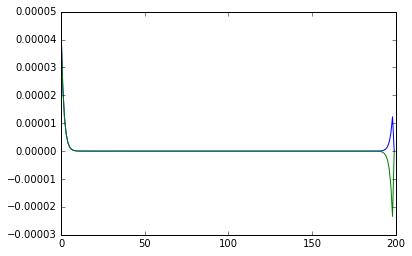

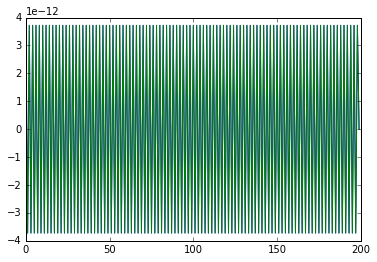

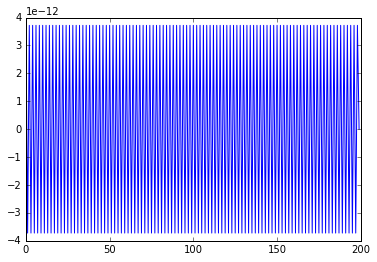

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation

import numpy as np
import math as m

nx = 200
srcori = int(nx/2) #source is at center
srcwid = 10 #source width
srcdel = 50 #source delay
nt = nx+srcdel

imp0 = 337.0 #impedance

ez = np.zeros(nx)
hy = np.zeros(nx)

fignum = 0
for dt in range(0,nt):
    
    hy[nx-2] = hy[nx-3]
    for j in range(0,nx-2):
        hy[j] = hy[j] + (ez[j+1]-ez[j])/imp0
        
    ez[0] = ez[1]
    for j in range(1,nx-1):
        ez[j] = ez[j] + (hy[j]-hy[j-1])*imp0
    #ez[srcori] += m.exp(-(dt-srcdel)*(dt-srcdel)/srcwid)
    ez[srcori] += m.exp(-((dt-srcdel)*(dt-srcdel))/(srcwid*srcwid))

    plt.hold(True)
    if (dt % 60 == 0 or dt == nt-2):
        fignum = fignum + 1
        plt.figure(fignum)
        plt.plot(ez)
        
        if (dt != nt-2):
            plt.plot(hy*imp0)